<a href="https://colab.research.google.com/github/mvdantas/Data-Science/blob/master/taxajuros_investing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install investpy

     |████████████████████████████████| 4.4 MB 14.9 MB/s 
     |████████████████████████████████| 235 kB 50.2 MB/s 
     |████████████████████████████████| 6.3 MB 42.7 MB/s 
     |████████████████████████████████| 510 kB 66.0 MB/s 
  Created wheel for investpy: filename=investpy-1.0.7-py3-none-any.whl size=4495221 sha256=faea8881d0501a0b2d64c85f04e183de0363ffa6c2fa59a0bf91ac71a9c88d0e
  Stored in directory: /root/.cache/pip/wheels/50/bb/ee/760eeb6cc7ed8efc1b1b23b13b6b9f17fb1ed530fb04bd16f5
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import investpy as inv

In [ ]:
import plotly.graph_objects as go

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.figsize']= (16,8)

In [ ]:
bondsBR = inv.get_bonds_list('brazil')
bondsBR

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [ ]:
bonds_overview = inv.get_bonds_overview('brazil')
bonds_overview

,country,name,last,last_close,high,low,change,change_percentage
0,brazil,Brazil 3M,5.965,5.951,5.951,5.816,+0.015,+0.24%
1,brazil,Brazil 6M,7.363,7.050,7.180,7.025,+0.312,+4.43%
2,brazil,Brazil 9M,8.163,7.970,8.025,7.950,+0.194,+2.43%
3,brazil,Brazil 1Y,8.715,8.490,8.640,8.460,+0.225,+2.65%
4,brazil,Brazil 2Y,9.415,9.645,9.810,9.575,-0.230,-2.38%
5,brazil,Brazil 3Y,9.462,9.970,10.120,9.920,-0.507,-5.09%
6,brazil,Brazil 5Y,9.987,10.205,10.220,10.025,-0.218,-2.14%
7,brazil,Brazil 8Y,10.630,10.910,10.910,10.680,-0.280,-2.57%
8,brazil,Brazil 10Y,11.090,11.135,11.135,11.110,-0.045,-0.40%


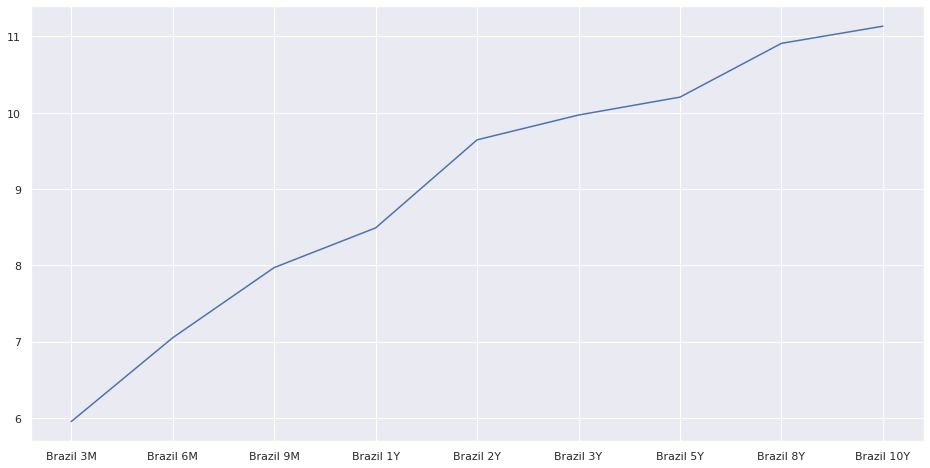

In [ ]:
plt.plot(bondsBR, bonds_overview['last_close'])

In [ ]:
data_inicio = '01/01/2010'
data_fim = '17/09/2021'
um_ano = inv.get_bond_historical_data('Brazil 1Y', from_date = data_inicio , to_date=data_fim)
um_ano

,Open,High,Low,Close
Date,,,,
2010-01-04,11.040,11.416,11.010,11.360
2010-01-05,11.370,11.400,11.310,11.320
2010-01-06,11.350,11.350,11.270,11.295
2010-01-07,11.275,11.416,11.270,11.416
2010-01-08,11.285,11.416,11.205,11.205
...,...,...,...,...
2021-09-13,8.745,8.745,8.745,8.745
2021-09-14,8.630,8.630,8.395,8.395
2021-09-15,8.395,8.570,8.395,8.570


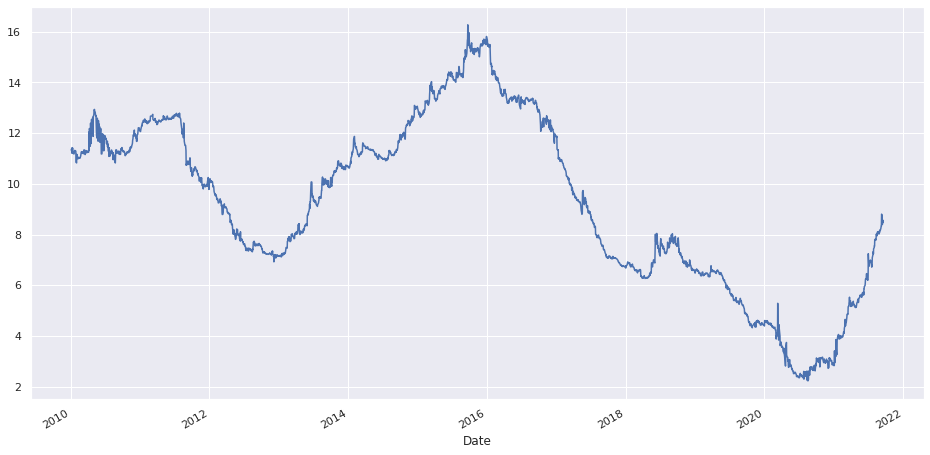

In [ ]:
um_ano['Close'].plot()

In [ ]:
data_inicio = '01/01/2010'
data_fim = '17/09/2021'
bonds = pd.DataFrame()

for prazo in bondsBR:
  bonds[prazo]=inv.get_bond_historical_data(prazo, from_date = data_inicio , to_date=data_fim)['Close']


In [ ]:
bonds.index = pd.to_datetime(bonds.index)

In [ ]:
bonds

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2010-01-04,8.680,9.170,10.475,11.360,11.910,12.70,12.740,NaN,NaN
2010-01-05,8.670,9.170,10.445,11.320,11.890,12.74,12.740,NaN,NaN
2010-01-06,8.670,9.140,10.330,11.295,11.820,12.75,12.740,NaN,NaN
2010-01-07,8.700,9.140,10.330,11.416,11.264,12.77,12.770,NaN,NaN
2010-01-08,8.650,9.110,10.300,11.205,11.770,12.76,12.760,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-09-13,5.778,7.325,8.235,8.745,9.765,10.05,10.130,10.810,10.965
2021-09-14,5.813,7.000,7.890,8.395,9.450,9.82,10.035,10.755,10.990
2021-09-15,5.718,7.140,7.980,8.570,9.695,10.01,9.925,10.590,11.100


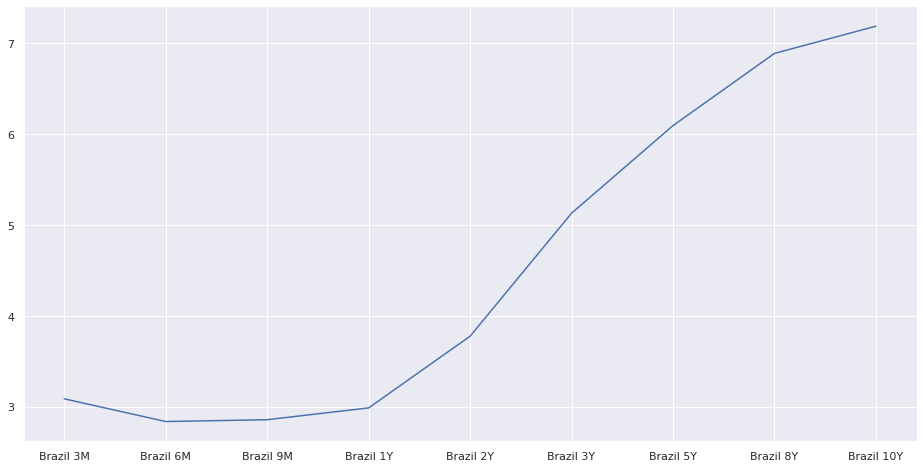

In [ ]:
plt.plot(bondsBR, bonds.loc['2020-04-23'].values)

In [ ]:
fig = go.Figure()

for i in bonds.index:
  fig.add_trace(go.Scatter(x=bondsBR, y=bonds.loc[i], mode = 'lines', name=str(i)))

fig.show()


In [ ]:
data_inicio = '01/01/2010'
data_fim = '17/09/2021'
bondsMensal = pd.DataFrame()

for prazo in bondsBR:
  bondsMensal[prazo]=inv.get_bond_historical_data(prazo, from_date = data_inicio , to_date=data_fim, interval='Monthly')['Close']


In [ ]:
fig = go.Figure()

for i in bondsMensal.index:
  fig.add_trace(go.Scatter(x=bondsBR, y=bondsMensal.loc[i], mode = 'lines', name=str(i), visible=False))

fig.data[0].visible = True

steps = []

for i in range(len(fig.data)):
  step = dict(
      method='restyle',
      args=['visible',[False] * len(fig.data)],
      label = fig.data[i]['name'] [:7] )

  step['args'][1][i] = True
  steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={'prefix':"Mês:"},
    pad={'t':50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    yaxis = dict(range=[3,14.5])
)
  
fig.show()

In [ ]:
def consulta_bc(codigo_bcb):
 url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
 df = pd.read_json(url)
 df['data'] = pd.to_datetime(df['data'],dayfirst = True)
 df.set_index('data', inplace=True)
 return df
#ver o cógigo. Exemplo 433 é o IPCA (bcbsgs)

In [ ]:
selic_meta = consulta_bc(432)

In [ ]:
s2015 = selic_meta[selic_meta.index.year >= 2015]
b2015 = bonds[bonds.index.year >=2015]

In [ ]:
fig = go.Figure()

for i in bondsBR:
  fig.add_trace(go.Scatter(x=b2015.index, y=b2015[i], mode = 'lines', name=str(i)))

fig.add_trace(go.Scatter(x=s2015.index, y=s2015['valor'], mode = 'lines', name='SELIC',line={'color':'black'}))

fig.show()